In [1]:
#LIBRARIES
import pandas as pd
import pymongo
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from pprint import pprint
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#CONNECT TO DATABASE
amazon = pymongo.MongoClient("mongodb://localhost:27017/")
db = amazon["Amazon_Reviews"]
mycollection = db["Amazon_Reviews"]

In [3]:
#EXTRACT USEFUL FEATURES
extracted_data = mycollection.find({},{'_id', 'ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator',                                     'Score' , 'Summary', 'Text'})
extracted_data= list(extracted_data)

In [4]:
#CONVERT TO DATAFRAMES
df = pd.DataFrame.from_dict(extracted_data)
df2 = pd.DataFrame.from_dict(extracted_data)
df2

,_id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,625667f95299462b59b911bf,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,625667f95299462b59b911c0,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,625667f95299462b59b911c1,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,625667f95299462b59b911c2,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,625667f95299462b59b911c3,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
568449,6256687f5299462b59c1be40,B001EO7N10,A28KG5XORO54AY,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,6256687f5299462b59c1be41,B003S1WTCU,A3I8AFVPEE8KI5,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,6256687f5299462b59c1be42,B004I613EE,A121AA1GQV751Z,2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,6256687f5299462b59c1be43,B004I613EE,A3IBEVCTXKNOH,1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


# SEPARATE POSITIVE AND NEGATIVE BASED ON SCORE

In [5]:
negative_review = df2.loc[df["Score"]<"3"]
negative_review=negative_review.dropna()
negative_review


,_id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
1,625667f95299462b59b911c0,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,625667f95299462b59b911c2,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
12,625667f95299462b59b911cb,B0009XLVG0,A327PCT23YH90,1,1,1,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
16,625667f95299462b59b911cf,B001GVISJM,A3KLWF6WQ5BNYO,0,0,2,poor taste,I love eating them and they are good for watch...
26,625667f95299462b59b911d9,B001GVISJM,A3RXAU2N8KV45G,0,1,1,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
...,...,...,...,...,...,...,...,...
568433,6256687f5299462b59c1be30,B003XUL27E,A1JUG9WCN1A52Z,0,0,1,Tastes horrible!,I just bought this soup today at my local groc...
568434,6256687f5299462b59c1be31,B003XUL27E,ABGQPE97ZVYJ3,0,0,2,Not so good,This soup is mostly broth. Although it has a k...
568435,6256687f5299462b59c1be32,B003XUL27E,A2PSB4WQHH46HN,0,2,2,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu..."
568446,6256687f5299462b59c1be3d,B001EO7N10,A2P9W8T7NTLG2Z,0,0,2,Mixed wrong,I had ordered some of these a few months back ...


In [6]:
positive_review= df.loc[df["Score"]>'3']
positive_review=positive_review.dropna()
positive_review

,_id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,625667f95299462b59b911bf,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,625667f95299462b59b911c1,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
4,625667f95299462b59b911c3,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
5,625667f95299462b59b911c4,B006K2ZZ7K,ADT0SRK1MGOEU,0,0,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,625667f95299462b59b911c5,B006K2ZZ7K,A1SP2KVKFXXRU1,0,0,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
...,...,...,...,...,...,...,...,...
568448,6256687f5299462b59c1be3f,B001EO7N10,A1F6BHEYB7R6R7,0,0,5,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,6256687f5299462b59c1be40,B001EO7N10,A28KG5XORO54AY,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...
568451,6256687f5299462b59c1be42,B004I613EE,A121AA1GQV751Z,2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,6256687f5299462b59c1be43,B004I613EE,A3IBEVCTXKNOH,1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [7]:
#Concatenate both dataframes into one
final=pd.concat([positive_review,negative_review])
final

,_id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,625667f95299462b59b911bf,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,625667f95299462b59b911c1,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
4,625667f95299462b59b911c3,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
5,625667f95299462b59b911c4,B006K2ZZ7K,ADT0SRK1MGOEU,0,0,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,625667f95299462b59b911c5,B006K2ZZ7K,A1SP2KVKFXXRU1,0,0,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
...,...,...,...,...,...,...,...,...
568433,6256687f5299462b59c1be30,B003XUL27E,A1JUG9WCN1A52Z,0,0,1,Tastes horrible!,I just bought this soup today at my local groc...
568434,6256687f5299462b59c1be31,B003XUL27E,ABGQPE97ZVYJ3,0,0,2,Not so good,This soup is mostly broth. Although it has a k...
568435,6256687f5299462b59c1be32,B003XUL27E,A2PSB4WQHH46HN,0,2,2,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu..."
568446,6256687f5299462b59c1be3d,B001EO7N10,A2P9W8T7NTLG2Z,0,0,2,Mixed wrong,I had ordered some of these a few months back ...


In [63]:
#negative_review.to_csv (r'C:\Users\jcgim\Downloads\negative_reviews', sep='\t', index = False, header=True)

In [64]:
#positive_review.to_csv (r'C:\Users\jcgim\Downloads\positive_reviews', sep='\t', index = False, header=True)

# ELIMINATION OF DUPLICATES

In [10]:
#Sort dataframe
sorteddf = final.sort_values('ProductId', axis=0, ascending=True)
finaldf = sorteddf.drop_duplicates(subset={'UserId', 'Text'}, keep='first', inplace=False)
finaldf.shape

(363859, 8)

In [11]:
print("Remaining original data", (finaldf['_id'].size*1.0) / (final['_id'].size*1.0)*100)

Remaining original data 69.19918450250468


In [12]:
#clean up rows with helpfulnessnumerator > denominator
finaldf = finaldf[finaldf.HelpfulnessNumerator<=finaldf.HelpfulnessDenominator]

In [13]:
#number of entries left
print(finaldf.shape)

#positive and negative reviews count
finaldf['Score'].value_counts()

(359889, 8)


5    249736
4     55763
1     34185
2     20205
Name: Score, dtype: int64

# PREPROCESSING

In [14]:
#random reviews
sent_0 = finaldf['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = finaldf['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = finaldf['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = finaldf['Text'].values[4900]
print(sent_4900)
print("="*50)

Classic children's book, can't go wrong. I read it when i was a kid and ordered it 20yrs later. can't beat that.
This is the most unbelievable treat.  My dog will do ANYTHING to get one of these.  They can be broken easily into smaller pieces and are EXCELLENT for training.  The first ingredient is Beef--No wonder my pooch is crazy about them!
i have just brought one small package of Canidea from my oversea agent 2weeks ago, before my puppy only tried a french brand. First i was just mixed them together and seems ok, but then the old finished there is something weird happened to her, she started eating the stools??!! >:( yes and also vomited white yellowish foam and coughing after totally swished into this brand, even sent her to vet checking blood, taking pills and medical treat which i was thinking she might catch cold. anyway only feel lucky is vet cost much cheaper here...<br />then now she refuse to eat it or only a little if really hungry. most of time she'd rather biting a bone,

In [15]:
import re
#returns the pattern occurences specified
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [17]:
from tqdm import tqdm
from bs4 import BeautifulSoup
#stop word removal and tokenization (separating the phrases into words)
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(finaldf['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = " ".join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 359889/359889 [02:44<00:00, 2183.18it/s]


In [18]:
#preprocessed random review
preprocessed_reviews[1000]

'unbelievable treat dog anything get one broken easily smaller pieces excellent training first ingredient beef no wonder pooch crazy'

# Word2Vec Model

In [19]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


In [21]:
# Train the Word2Vec model
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())


In [22]:
is_your_ram_gt_16g = False
want_to_use_google_w2v = False
want_to_train_w2v = True
#displays the similar words from the corpus
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sentance, min_count=5, vector_size=50, workers=4)
print(w2v_model.wv.most_similar('great'))
print('='*100)
print(w2v_model.wv.most_similar('worst'))

[('terrific', 0.8925461769104004), ('fantastic', 0.8814128637313843), ('good', 0.8617279529571533), ('excellent', 0.8561203479766846), ('awesome', 0.8527269959449768), ('wonderful', 0.8215980529785156), ('perfect', 0.7851353883743286), ('nice', 0.7588838934898376), ('fabulous', 0.7187572121620178), ('amazing', 0.7161523699760437)]
[('nastiest', 0.8334977030754089), ('disgusting', 0.7538552284240723), ('greatest', 0.7236900925636292), ('terrible', 0.7135036587715149), ('best', 0.7098350524902344), ('horrible', 0.7043948769569397), ('horrid', 0.702325701713562), ('awful', 0.6874402165412903), ('tastiest', 0.6708576083183289), ('vile', 0.6662353873252869)]


In [23]:
w2v_words = list(w2v_model.wv.index_to_key)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  33138
sample words  ['not', 'like', 'good', 'great', 'one', 'taste', 'product', 'would', 'flavor', 'coffee', 'tea', 'love', 'no', 'get', 'food', 'really', 'amazon', 'use', 'much', 'also', 'time', 'little', 'best', 'find', 'buy', 'price', 'make', 'tried', 'well', 'even', 'better', 'try', 'chocolate', 'eat', 'sugar', 'first', 'water', 'used', 'could', 'found', 'sweet', 'made', 'free', 'bought', 'bag', 'drink', 'dog', 'box', 'cup', 'store']


In [25]:
import matplotlib.pyplot as plt

In [62]:
# oc = w2v_model.wv.most_similar('bad')
# ocurrence = pd.DataFrame(pos)
# ocurrence.to_csv('negative', sep='\t', index = None)

In [65]:
w2v_words

['not',
 'like',
 'good',
 'great',
 'one',
 'taste',
 'product',
 'would',
 'flavor',
 'coffee',
 'tea',
 'love',
 'no',
 'get',
 'food',
 'really',
 'amazon',
 'use',
 'much',
 'also',
 'time',
 'little',
 'best',
 'find',
 'buy',
 'price',
 'make',
 'tried',
 'well',
 'even',
 'better',
 'try',
 'chocolate',
 'eat',
 'sugar',
 'first',
 'water',
 'used',
 'could',
 'found',
 'sweet',
 'made',
 'free',
 'bought',
 'bag',
 'drink',
 'dog',
 'box',
 'cup',
 'store',
 'way',
 'delicious',
 'two',
 'tastes',
 'order',
 'since',
 'day',
 'think',
 'go',
 'mix',
 'recommend',
 'nice',
 'many',
 'still',
 'know',
 'bit',
 'add',
 'got',
 'never',
 'hot',
 'favorite',
 'give',
 'stuff',
 'milk',
 'years',
 'want',
 'makes',
 'every',
 'always',
 'without',
 'brand',
 'something',
 'flavors',
 'right',
 'ever',
 'lot',
 'quality',
 'perfect',
 'fresh',
 'easy',
 'say',
 'back',
 'less',
 'ordered',
 'different',
 'organic',
 'healthy',
 'enough',
 'using',
 'oil',
 'loves',
 'keep',
 'product

In [66]:
#score count
print(finaldf.shape)
finaldf['Score'].value_counts()

(359889, 8)


5    249736
4     55763
1     34185
2     20205
Name: Score, dtype: int64

In [68]:
#HelpfulnessNumerator count
finaldf['HelpfulnessNumerator'].value_counts()

0      190681
1       74497
2       34867
3       18930
4       11229
        ...  
538         1
193         1
212         1
164         1
120         1
Name: HelpfulnessNumerator, Length: 220, dtype: int64

In [69]:
#HelpfulnessDenominator count
finaldf['HelpfulnessDenominator'].value_counts()

0      171395
1       72452
2       39301
3       22278
4       14675
        ...  
190         1
147         1
486         1
222         1
187         1
Name: HelpfulnessDenominator, Length: 221, dtype: int64

In [88]:
negative_words = pd.read_csv('negative.txt', sep='\t')
positive_words = pd.read_csv('positive.txt', sep='\t')

In [90]:
#count the frequency of certain words
x1 = negative_words.Negative
y1 = negative_words.Count
negative_words

,Negative,Count
0,bad,12816
1,waste/wasted,5264
2,horrible,4649
3,ok/okay,4490
4,awful,4408
5,terrible,4385
6,expensive,3761
7,cheap,2684
8,nasty,2457
9,beware,2386


In [92]:
x1 = negative_words.Negative
y1 = negative_words.Count

0     12816
1      5264
2      4649
3      4490
4      4408
5      4385
6      3761
7      2684
8      2457
9      2386
10     2025
11     1521
12     1019
13      818
Name: Count, dtype: int64

In [87]:
#count the frequency of certain words
positive_words

,Positive,Count
0,good,202795
1,best,101359
2,better,57839
3,nice,40660
4,perfect,36766
5,excellent,34431
6,wonderful,27749
7,worth,18869
8,expensive,18510
9,amazing,16277


<AxesSubplot:xlabel='Negative'>

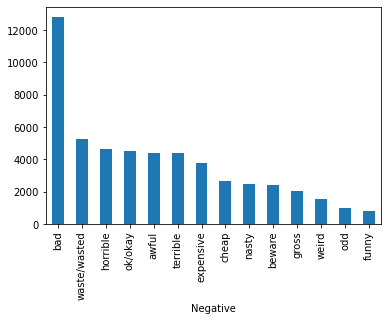

In [122]:
negative_words.plot(kind='bar', x='Negative', y='Count', legend=None)

<AxesSubplot:xlabel='Positive'>

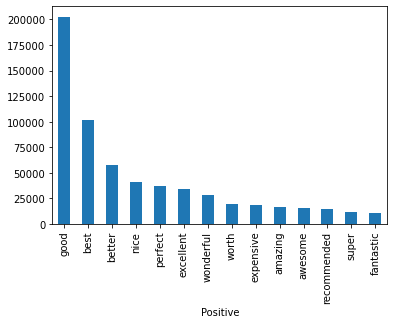

In [123]:
positive_words.plot(kind='bar', x='Positive', y='Count', legend=None)

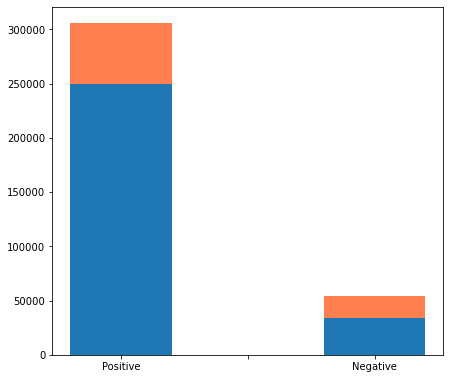

In [121]:
#show the frequency of positive and negative terms in the dataset
x = ['Positive',' ',  'Negative']
y1 = [249736, 0, 34185 ]
y2 = [55763, 0, 20205]

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(6.4)
# plot bars in stack manner
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1, color='coral')
plt.show()